# PCA with UV-Vis data with POUR runs (190-300 nm)

In [1]:
# Import packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mpl_toolkits import mplot3d

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

# Set seed
seed = 4

In [2]:
# Import data
data = pd.read_csv('Datasets/pour_saline_uvvis.csv')

In [3]:
data

,Urea Concentration (mM),Date,Time (hr),Run through (y/n),190,191,192,193,194,195,...,791,792,793,794,795,796,797,798,799,800
0,40.00,"Sept. 14, 2021",0,0,0.000,-0.018,-0.008,-0.040,-0.029,-0.003,...,0.000,-0.004,-0.001,-0.001,-0.002,0.000,-0.001,-0.003,-0.001,-0.002
1,39.76,"Sept. 14, 2021",0,1,0.024,0.014,0.026,0.003,0.010,0.034,...,0.001,-0.003,0.001,0.001,-0.002,0.002,0.001,-0.001,0.001,0.000
2,39.32,"Sept. 14, 2021",1,1,0.110,0.099,0.111,0.090,0.094,0.130,...,-0.001,-0.004,-0.001,-0.003,-0.004,-0.002,-0.001,-0.004,-0.002,-0.002
3,38.87,"Sept. 14, 2021",2,1,0.174,0.203,0.195,0.176,0.192,0.219,...,0.000,-0.002,0.000,0.000,-0.002,0.001,0.000,-0.003,0.000,0.000
4,38.41,"Sept. 14, 2021",3,1,0.223,0.231,0.225,0.188,0.233,0.256,...,0.000,-0.004,0.000,-0.002,-0.003,0.000,-0.001,-0.004,-0.002,-0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,6.14,"Nov. 16, 2021",4,1,0.260,0.254,0.308,0.263,0.321,0.306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,5.65,"Nov. 16, 2021",5,1,0.284,0.302,0.342,0.298,0.324,0.341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,5.65,"Nov. 16, 2021",5,1,0.295,0.306,0.330,0.305,0.341,0.345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,6.02,"Nov. 16, 2021",6,1,0.305,0.307,0.341,0.304,0.352,0.328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Define features and targets
X = data.drop(data.columns[0:4], axis=1)
X = X.drop(X.columns[111:615], axis=1)
y = data['Urea Concentration (mM)']

In [17]:
X

,190,191,192,193,194,195,196,197,198,199,...,291,292,293,294,295,296,297,298,299,300
0,0.000,-0.018,-0.008,-0.040,-0.029,-0.003,-0.027,-0.019,0.021,0.131,...,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,-0.006,-0.006,-0.006,-0.006
1,0.024,0.014,0.026,0.003,0.010,0.034,0.026,0.026,0.069,0.172,...,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005
2,0.110,0.099,0.111,0.090,0.094,0.130,0.120,0.142,0.189,0.309,...,0.010,0.009,0.009,0.008,0.008,0.007,0.007,0.007,0.007,0.007
3,0.174,0.203,0.195,0.176,0.192,0.219,0.222,0.245,0.304,0.424,...,0.014,0.012,0.011,0.010,0.009,0.008,0.008,0.007,0.006,0.006
4,0.223,0.231,0.225,0.188,0.233,0.256,0.254,0.286,0.319,0.469,...,0.025,0.024,0.021,0.020,0.019,0.017,0.016,0.015,0.014,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.260,0.254,0.308,0.263,0.321,0.306,0.322,0.350,0.364,0.536,...,0.036,0.034,0.031,0.028,0.026,0.025,0.022,0.021,0.020,0.018
86,0.284,0.302,0.342,0.298,0.324,0.341,0.340,0.383,0.396,0.568,...,0.043,0.040,0.037,0.034,0.031,0.029,0.026,0.024,0.023,0.021
87,0.295,0.306,0.330,0.305,0.341,0.345,0.359,0.395,0.409,0.576,...,0.043,0.040,0.036,0.034,0.031,0.029,0.027,0.025,0.023,0.022
88,0.305,0.307,0.341,0.304,0.352,0.328,0.362,0.401,0.412,0.584,...,0.048,0.045,0.041,0.038,0.035,0.032,0.030,0.028,0.026,0.025


In [9]:
# Normalize data
sc = StandardScaler()
X = sc.fit_transform(X)

In [10]:
# Do PCA
pca = PCA(n_components=10, random_state=seed)
X_pca = pca.fit_transform(X)

print("Variance explained by all 10 PC's =", sum(pca.explained_variance_ratio_ *100))

Variance explained by all 10 PC's = 99.97971875682073


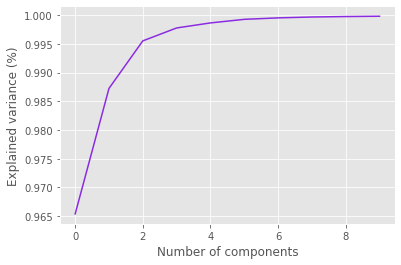

In [11]:
# Elbow Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='blueviolet')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (%)')
plt.savefig('elbow_plot.png', dpi=100)

In [12]:
np.cumsum(pca.explained_variance_ratio_)

array([0.96540157, 0.98724068, 0.99551131, 0.99775826, 0.99863405,
       0.99925836, 0.9995135 , 0.99966335, 0.99974467, 0.99979719])

Text(0, 0.5, 'Second principal component')

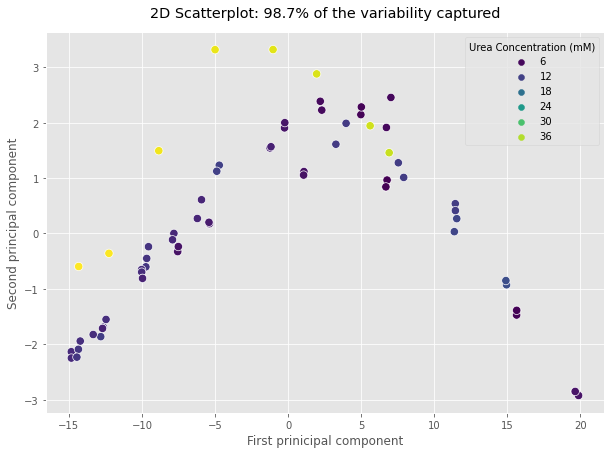

In [13]:
# If we apply PCA with n_components=2
pca_2 = PCA(n_components=2, random_state=seed)
X_pca_2 = pca_2.fit_transform(X)


# Plot it
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], s=70,
               hue=y, palette='viridis')

plt.title('2D Scatterplot: 98.7% of the variability captured', pad=15)
plt.xlabel('First prinicipal component')
plt.ylabel('Second principal component')

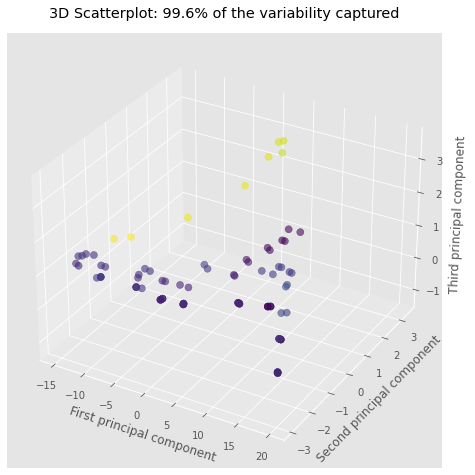

In [14]:
# Plot it in 3D
pca_3 = PCA(n_components=3, random_state=seed)
X_pca_3 = pca_3.fit_transform(X)

fig = plt.figure(figsize = (12, 8))
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2],
                   c = y, s=50, alpha=0.6)

plt.title('3D Scatterplot: 99.6% of the variability captured', pad=15)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')
plt.savefig('3d_scatterplot.png')